# Lead Scoring Case Study
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

In [165]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [166]:
df = pd.read_csv('Leads.csv')
df.drop_duplicates(inplace = True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [167]:
df.shape

(9240, 37)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [169]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that certain columns have very high null values upto nearly 30%. We can drop those columns.

In [170]:
for i in df.columns:
    if 100*(df[i].isnull().sum()/len(df)) > 29:
        df.drop(i, axis = 1, inplace = True)

In [171]:
round(100*(df.isnull().sum()/len(df)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [172]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [173]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

We can see the similarities between the above 2 variables not only in terms of the values of the variable but also in terms of the distribution. So we will drop one of them.

In [174]:
df.drop('Last Activity', axis = 1, inplace = True)

For categorcial columns, the convention to replace null values is by replacing them with the mode while for the numerical columns it is the median.

In [175]:
cat_cols_null = [i for i in df.select_dtypes(include = 'object').columns if df[i].isnull().sum() > 0]
cat_cols_null

['Lead Source',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'City']

In [176]:
for i in cat_cols_null:
    print(i, df[i].unique())
    print('')

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

Country [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']

Specialization ['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investm

In [177]:
for i in cat_cols_null:
    if 'Select' in list(df[i]):
        print(i)

Specialization
How did you hear about X Education
City


We can see that 3 columns have 'Select' as a value which is equivalent to being a Null value. Now we will inspecting their distribution and if it exceeds our threshold, we will drop them.

In [178]:
for i in cat_cols_null:
    if 100*(len(df.loc[df[i] == 'Select'])/len(df)) + 100*(df[i].isnull().sum()/len(df)) >= 29:
        print(i, round(100*(len(df.loc[df[i] == 'Select'])/len(df)) + 100*(df[i].isnull().sum()/len(df)), 2))
        df.drop(i, axis = 1, inplace = True)
        cat_cols_null = list(set(cat_cols_null).difference(set({i})))

Specialization 36.58
How did you hear about X Education 78.46
City 39.71


In [179]:
cat_cols_null

['Lead Source', 'Country']

In [180]:
num_cols_null = [i for i in df.select_dtypes(exclude = 'object').columns if df[i].isnull().sum() > 0]
num_cols_null

['TotalVisits', 'Page Views Per Visit']

In [181]:
for i in cat_cols_null:
    df[i].fillna(list(df[i].mode().values)[0], inplace = True)
for i in num_cols_null:
    df[i].fillna(df[i].median(), inplace = True)

In [182]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Country                                     0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [183]:
for i in df.drop('Prospect ID', axis = 1).select_dtypes(include = 'object').columns:
    print(i)
    print(df[i].value_counts())
    print('----------')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
testone                 1
blog                    1
Name: Lead Source, dtype: int64
----------
Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
----------
Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64
----------
Country
India           

We see that for variables 'Do Not Call', 'Country' and for some other variables the distribution of data is very non uniform. We will drop these 2 first and inspect others subsequently.

In [184]:
df.drop(['Do Not Call', 'Country'], axis = 1, inplace = True)

### Outlier Analysis

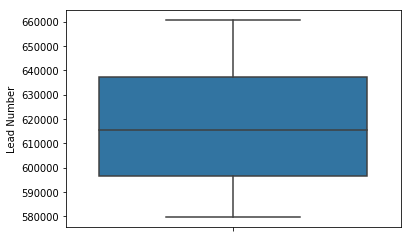

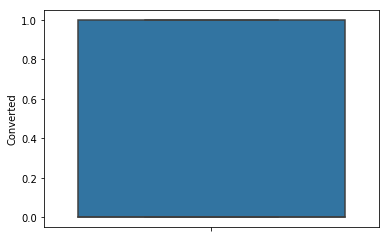

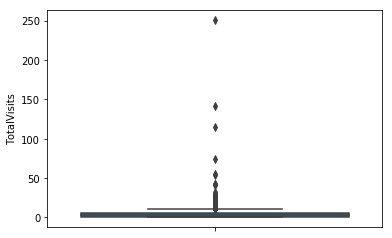

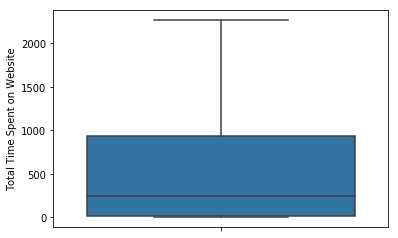

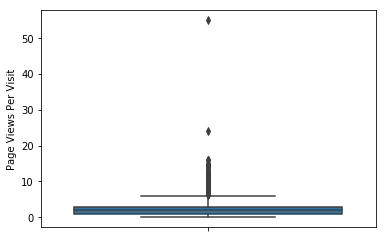

In [185]:
for i in [i for i in df.select_dtypes(exclude = 'object').columns]:
    sns.boxplot(y = df[i])
    plt.show()

For 3 variables 'Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits' we can see the presence of outliers. We need to take care of them first.

In [186]:
for i in ['Page Views Per Visit', 'Total Time Spent on Website', 'TotalVisits']:
    df[i] = df[i].apply(lambda x : np.quantile(df[i], 0.95) if x > np.quantile(df[i], 0.95) else x)

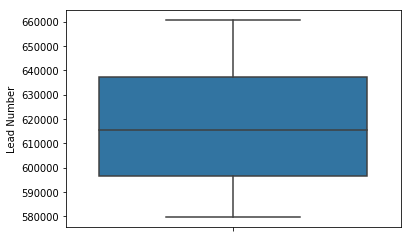

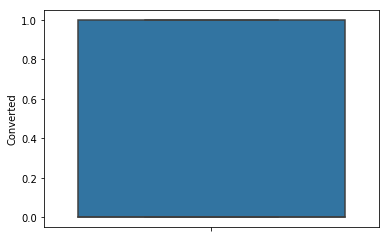

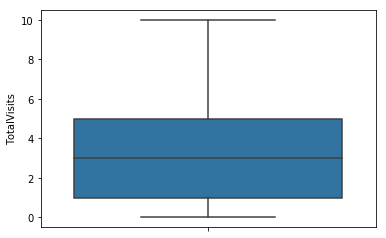

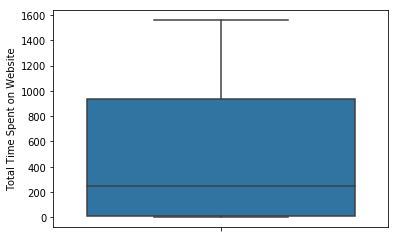

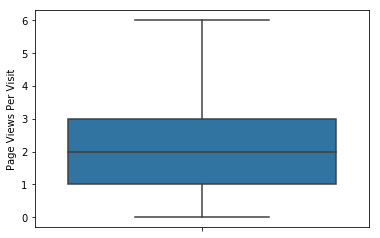

In [187]:
for i in [i for i in df.select_dtypes(exclude = 'object').columns]:
    sns.boxplot(y = df[i])
    plt.show()

Now we can see that the data has a better distribution now.

In [188]:
from itertools import combinations
comb = list(combinations(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'], 2))
for x, y in comb:
    print(x, y)
    print(len(df.loc[(df[x] == 'Yes') & (df[y] == 'Yes')]))
    print('--------')

Search Magazine
0
--------
Search Newspaper Article
1
--------
Search X Education Forums
1
--------
Search Newspaper
0
--------
Search Digital Advertisement
1
--------
Magazine Newspaper Article
0
--------
Magazine X Education Forums
0
--------
Magazine Newspaper
0
--------
Magazine Digital Advertisement
0
--------
Newspaper Article X Education Forums
1
--------
Newspaper Article Newspaper
0
--------
Newspaper Article Digital Advertisement
1
--------
X Education Forums Newspaper
0
--------
X Education Forums Digital Advertisement
1
--------
Newspaper Digital Advertisement
0
--------


Columns like 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement' represent different modes of how the customers came to know about the X Education. It means that if, for instance, for a column 'Search' if we see 'Yes', then ideally the value in the same row for other columns should be 'No'. That is not the case as we can see above but that is the most likely scenario and that's why we can see that for any 2 columns the presence of 'Yes' in both the columns is not more than 1 which itself is a very small value.

In [189]:
for i in ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement']:
    print(i, df[i].value_counts())
    print('-----------------------')

Search No     9226
Yes      14
Name: Search, dtype: int64
-----------------------
Magazine No    9240
Name: Magazine, dtype: int64
-----------------------
Newspaper Article No     9238
Yes       2
Name: Newspaper Article, dtype: int64
-----------------------
X Education Forums No     9239
Yes       1
Name: X Education Forums, dtype: int64
-----------------------
Newspaper No     9239
Yes       1
Name: Newspaper, dtype: int64
-----------------------
Digital Advertisement No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
-----------------------


It's very evident that these variables have a very disappropriate ratio of 'Yes' and 'No' the highest being 14 'Yes' in 9240 rows for 'Search' column. So we can drop these columns as well.

In [190]:
df.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'], axis = 1, inplace = True)

In [191]:
df.select_dtypes(include = 'object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [192]:
for i in df.select_dtypes(include = 'object').columns:
    if df[i].nunique() == 2:
        print(i)

Do Not Email
Through Recommendations
A free copy of Mastering The Interview


The above columns have only 2 values and therefore we can change them into numerical values with the same program.

In [193]:
for i in df.select_dtypes(include = 'object').columns:
    if df[i].nunique() == 2:
        print(i)
        print(df[i].value_counts())
        print('------')

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
------
Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
------
A free copy of Mastering The Interview
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
------


In [194]:
for j in [i for i in df.select_dtypes(include = 'object').columns if (df[i].nunique() == 2) or (df[i].nunique() == 1)]:
    df[j] = df[j].apply(lambda x : 1 if x.lower() == 'yes' else 0)

In [195]:
for i in [i for i in df.columns if (df[i].nunique() == 1)]:
    print(i)
    print(df[i].value_counts())
    print('-----------------')

Receive More Updates About Our Courses
0    9240
Name: Receive More Updates About Our Courses, dtype: int64
-----------------
Update me on Supply Chain Content
0    9240
Name: Update me on Supply Chain Content, dtype: int64
-----------------
Get updates on DM Content
0    9240
Name: Get updates on DM Content, dtype: int64
-----------------
I agree to pay the amount through cheque
0    9240
Name: I agree to pay the amount through cheque, dtype: int64
-----------------


We can see that some columns have only 1 value i.e., 0. These columns exhibit no variance and therefore we should drop them.

In [196]:
df.drop([i for i in df.columns if (df[i].nunique() == 1)], axis = 1, inplace = True)

In [197]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0.0,0.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674.0,2.5,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532.0,2.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305.0,1.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428.0,1.0,0,0,Modified


Now we will create dataframes which we will further process and ultimately use.

In [198]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [199]:
#X = df[list(set(df.columns).difference(set({'Prospect ID', 'Lead Number', 'Converted'})))]
#y = df['Converted']

In [200]:
# list(X.select_dtypes(include = 'object').columns)

In [201]:
dummies1 = pd.get_dummies(df['Lead Source'], drop_first = True)
dummies3 = pd.get_dummies(df['Last Notable Activity'], drop_first = True)
dummies4 = pd.get_dummies(df['Lead Origin'], drop_first = True)

In [202]:
for i in ['Last Notable Activity', 'Lead Source', 'Lead Origin']:
    df.drop(i, axis = 1, inplace = True)

In [203]:
df = pd.concat([df, dummies1], axis = 1)
df = pd.concat([df, dummies3], axis = 1)
df = pd.concat([df, dummies4], axis = 1)
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Direct Traffic,...,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674.0,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532.0,2.0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305.0,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428.0,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [204]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [205]:
# Standardizing the Data
num_cols = [i for i in df.drop(['Prospect ID', 'Lead Number'], axis = 1).select_dtypes(exclude = 'object').columns if df[i].nunique() > 2]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

### Feature Selection using RFE

In [206]:
X_train = df_train.drop(['Prospect ID', 'Lead Number', 'Converted'], axis = 1)
X_test = df_test.drop(['Prospect ID', 'Lead Number', 'Converted'], axis = 1)
y_train = df_train['Converted']
y_test = df_test['Converted']

In [207]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [208]:
# Selecting top 30 features
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 30)
rfe = rfe.fit(X_train, y_train)

In [209]:
#list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

In [210]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Through Recommendations', 'Direct Traffic', 'Facebook', 'Google',
       'NC_EDM', 'Olark Chat', 'Organic Search', 'Press_Release', 'Reference',
       'Referral Sites', 'Social Media', 'Welingak Website', 'blog', 'google',
       'Email Link Clicked', 'Email Opened', 'Email Received',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'],
      dtype='object')

# Model Building

#### Model 1

In [211]:
import statsmodels.api as sm
X_final = X_train[cols]
classifier1 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.5
Date:                Tue, 03 Mar 2020   Deviance:                       5701.1
Time:                        12:30:24   Pearson chi2:                 6.65e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.3533      0.906     -0.390      0.697      -2.129       1.423
Do Not Email                   -1.4843      0.189     -7.859      0.000      -1.854      -1.114
Total Time Spent on Website     1.1353      0.039     29.442      0.000       1.060       1.211
Through Recommendations         2.0902      1.361      1.536      0.125      -0.577       4.758
Direct Traffic                 -0.3766      0.783     -0.481      0.630      -1.911       1.158
Facebook                       -1.5267      1.846     -0.827      0.408      -5.145       2.091
Google                         -0.0074      0.782     -0.010      0.992      -1.539       1.524
NC_EDM                         22.4890   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.8134      0.784      1.037      0.300      -0.724       2.351
Organic Search                 -0.1404      0.785     -0.179      0.858      -1.680       1.399
Press_Release                 -20.3600   3.09e+04     -0.001      0.999   -6.06e+04    6.05e+04
Reference                       1.0912      0.907      1.203      0.229      -0.686       2.869
Referral Sites                 -0.3016      0.835     -0.361      0.718      -1.938       1.334
Social Media                    1.4687      1.726      0.851      0.395      -1.915       4.852
Welingak Website                3.3825      1.344      2.516      0.012       0.748       6.017
blog                          -22.0982   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
google                        -21.7208   2.63e+04     -0.001      0.999   -5.15e+04    5.14e+04
Email Link Clicked             -1.0258      0.531     -1.931      0.053      -2.067       0.015
Email Opened                   -0.5381      0.470     -1.145      0.252      -1.459       0.383
Email Received                 22.3231   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        2.0960      1.235      1.698      0.090      -0.324       4.516
Modified                       -1.2729      0.468     -2.722      0.006      -2.189      -0.356
Olark Chat Conversation        -1.9579      0.555     -3.530      0.000      -3.045      -0.871
Page Visited on Website        -0.6822      0.493     -1.383      0.167      -1.649       0.285
Resubscribed to emails         23.1348   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
SMS Sent                        0.9475      0.467      2.028      0.043       0.032       1.863
Unreachable                     1.1180      0.692      1.616      0.106      -0.238       2.474
Unsubscribed                    0.5267      0.637      0.826      0.409      -0.722       1.776
Lead Add Form                   3.0026      0.510      5.886      0.000       2.003       4.002
Lead Import                     0.7987      1.673      0.477      0.633      -2.481       

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Modified,45.29
5,Google,38.41
17,Email Opened,38.25
3,Direct Traffic,35.53
24,SMS Sent,29.50
7,Olark Chat,24.25
10,Reference,19.46
4,Facebook,18.94
27,Lead Add Form,18.42
28,Lead Import,18.28


In [213]:
# Dropping 'Modified' column
X_final.drop('Modified', axis = 1, inplace = True)

#### Model 2

In [216]:
classifier2 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.8
Date:                Tue, 03 Mar 2020   Deviance:                       5707.6
Time:                        12:30:57   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6054      0.778     -2.062      0.039      -3.131      -0.080
Do Not Email                   -1.3399      0.176     -7.593      0.000      -1.686      -0.994
Total Time Spent on Website     1.1362      0.039     29.478      0.000       1.061       1.212
Through Recommendations         2.0921      1.361      1.537      0.124      -0.576       4.760
Direct Traffic                 -0.3884      0.779     -0.499      0.618      -1.916       1.139
Facebook                       -1.5345      1.847     -0.831      0.406      -5.155       2.086
Google                         -0.0142      0.778     -0.018      0.985      -1.539       1.511
NC_EDM                         22.4782   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.8023      0.781      1.028      0.304      -0.728       2.333
Organic Search                 -0.1536      0.782     -0.196      0.844      -1.686       1.379
Press_Release                 -20.5260   3.09e+04     -0.001      0.999   -6.06e+04    6.05e+04
Reference                       1.1349      0.902      1.258      0.208      -0.633       2.903
Referral Sites                 -0.3148      0.831     -0.379      0.705      -1.944       1.314
Social Media                    1.4478      1.725      0.839      0.401      -1.933       4.829
Welingak Website                3.4639      1.342      2.582      0.010       0.834       6.093
blog                          -22.1086   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
google                        -21.7422   2.62e+04     -0.001      0.999   -5.15e+04    5.14e+04
Email Link Clicked              0.2370      0.260      0.910      0.363      -0.273       0.747
Email Opened                    0.7241      0.083      8.740      0.000       0.562       0.886
Email Received                 23.5814   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.3553      1.146      2.929      0.003       1.110       5.600
Olark Chat Conversation        -0.6967      0.306     -2.274      0.023      -1.297      -0.096
Page Visited on Website         0.5690      0.184      3.093      0.002       0.208       0.930
Resubscribed to emails         24.3988   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.2011      0.090     24.392      0.000       2.024       2.378
Unreachable                     2.3760      0.515      4.611      0.000       1.366       3.386
Unsubscribed                    1.6497      0.498      3.310      0.001       0.673       2.626
Lead Add Form                   2.9451      0.508      5.797      0.000       1.949       3.941
Lead Import                     0.7896      1.676      0.471      0.638      -2.496       4.075
Quick Add Form                 23.2015   4.82e+04      0.000      1.000   -9.44e+04    9.4

In [217]:
vif = pd.DataFrame()
vif['Features'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,Lead Import,18.28
4,Facebook,18.27
26,Lead Add Form,18.25
10,Reference,14.52
13,Welingak Website,4.63
17,Email Opened,1.92
3,Direct Traffic,1.71
23,SMS Sent,1.71
5,Google,1.64
7,Olark Chat,1.46


In [218]:
# Dropping 'Lead Import' column
X_final.drop('Lead Import', axis = 1, inplace = True)

#### Model 3

In [219]:
classifier3 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier3 = classifier3.fit()
classifier3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.9
Date:                Tue, 03 Mar 2020   Deviance:                       5707.8
Time:                        12:31:29   Pearson chi2:                 6.70e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6052      0.778     -2.062      0.039      -3.131      -0.079
Do Not Email                   -1.3397      0.176     -7.593      0.000      -1.686      -0.994
Total Time Spent on Website     1.1360      0.039     29.474      0.000       1.061       1.212
Through Recommendations         2.0915      1.361      1.536      0.124      -0.576       4.759
Direct Traffic                 -0.3883      0.779     -0.498      0.618      -1.915       1.139
Facebook                       -0.8036      0.975     -0.824      0.410      -2.715       1.108
Google                         -0.0137      0.778     -0.018      0.986      -1.538       1.511
NC_EDM                         22.4779   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.8021      0.781      1.027      0.304      -0.728       2.332
Organic Search                 -0.1535      0.782     -0.196      0.844      -1.686       1.379
Press_Release                 -20.5263   3.09e+04     -0.001      0.999   -6.06e+04    6.05e+04
Reference                       1.1350      0.902      1.258      0.208      -0.633       2.903
Referral Sites                 -0.3149      0.831     -0.379      0.705      -1.944       1.314
Social Media                    1.4475      1.725      0.839      0.401      -1.933       4.828
Welingak Website                3.4640      1.342      2.582      0.010       0.834       6.094
blog                          -22.1089   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
google                        -21.7424   2.62e+04     -0.001      0.999   -5.15e+04    5.14e+04
Email Link Clicked              0.2367      0.260      0.909      0.363      -0.274       0.747
Email Opened                    0.7242      0.083      8.742      0.000       0.562       0.887
Email Received                 23.5808   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.3545      1.145      2.928      0.003       1.109       5.600
Olark Chat Conversation        -0.6970      0.306     -2.275      0.023      -1.297      -0.097
Page Visited on Website         0.5686      0.184      3.091      0.002       0.208       0.929
Resubscribed to emails         24.3986   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.1999      0.090     24.392      0.000       2.023       2.377
Unreachable                     2.3755      0.515      4.610      0.000       1.365       3.385
Unsubscribed                    1.6491      0.498      3.309      0.001       0.672       2.626
Lead Add Form                   2.9447      0.508      5.796      0.000       1.949       3.940
Quick Add Form                 23.2010   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
==========================================================================================

In [220]:
vif = pd.DataFrame()
vif['Features'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,Lead Add Form,18.25
10,Reference,14.52
13,Welingak Website,4.63
17,Email Opened,1.92
3,Direct Traffic,1.71
23,SMS Sent,1.70
5,Google,1.64
7,Olark Chat,1.46
8,Organic Search,1.29
1,Total Time Spent on Website,1.27


In [221]:
# Dropping 'Lead Add Form' column
X_final.drop('Lead Add Form', axis = 1, inplace = True)

#### Model 4

In [222]:
classifier4 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier4 = classifier4.fit()
classifier4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.3
Date:                Tue, 03 Mar 2020   Deviance:                       5748.7
Time:                        12:31:58   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9421      0.659     -1.429      0.153      -2.235       0.350
Do Not Email                   -1.2130      0.171     -7.078      0.000      -1.549      -0.877
Total Time Spent on Website     1.1162      0.038     29.249      0.000       1.041       1.191
Through Recommendations         2.0793      1.361      1.528      0.127      -0.588       4.747
Direct Traffic                 -1.0568      0.660     -1.600      0.110      -2.351       0.238
Facebook                       -1.4636      0.881     -1.660      0.097      -3.191       0.264
Google                         -0.6386      0.660     -0.968      0.333      -1.932       0.655
NC_EDM                         21.8269   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Olark Chat                      0.1197      0.662      0.181      0.856      -1.177       1.417
Organic Search                 -0.8215      0.664     -1.238      0.216      -2.122       0.479
Press_Release                 -21.2953   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
Reference                       3.3886      0.688      4.928      0.000       2.041       4.736
Referral Sites                 -0.9744      0.721     -1.352      0.177      -2.387       0.439
Social Media                    0.7873      1.671      0.471      0.637      -2.487       4.061
Welingak Website                5.7030      1.208      4.721      0.000       3.335       8.071
blog                          -22.7695   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
google                        -22.3892   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Email Link Clicked              0.2392      0.260      0.920      0.357      -0.270       0.749
Email Opened                    0.7292      0.083      8.836      0.000       0.567       0.891
Email Received                 23.5532   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.3108      1.144      2.894      0.004       1.069       5.553
Olark Chat Conversation        -0.6943      0.305     -2.274      0.023      -1.293      -0.096
Page Visited on Website         0.5529      0.183      3.023      0.003       0.194       0.911
Resubscribed to emails         24.3999   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.2151      0.090     24.641      0.000       2.039       2.391
Unreachable                     2.3570      0.514      4.590      0.000       1.351       3.364
Unsubscribed                    1.7323      0.487      3.557      0.000       0.778       2.687
Quick Add Form                 23.0768   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===============================================================================================
"""

In [225]:
# Dropping 'NC_EDM' column
X_final.drop('NC_EDM', axis = 1, inplace = True)

#### Model 5

In [226]:
classifier5 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier5 = classifier5.fit()
classifier5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.7
Date:                Tue, 03 Mar 2020   Deviance:                       5749.4
Time:                        12:33:05   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.8158      0.627     -1.302      0.193      -2.044       0.413
Do Not Email                   -1.2127      0.171     -7.076      0.000      -1.549      -0.877
Total Time Spent on Website     1.1166      0.038     29.260      0.000       1.042       1.191
Through Recommendations         2.0792      1.361      1.528      0.127      -0.589       4.747
Direct Traffic                 -1.1837      0.628     -1.886      0.059      -2.414       0.047
Facebook                       -1.5903      0.857     -1.855      0.064      -3.271       0.090
Google                         -0.7654      0.627     -1.221      0.222      -1.994       0.464
Olark Chat                     -0.0065      0.629     -0.010      0.992      -1.240       1.227
Organic Search                 -0.9483      0.631     -1.503      0.133      -2.185       0.289
Press_Release                 -21.4224   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
Reference                       3.2624      0.656      4.970      0.000       1.976       4.549
Referral Sites                 -1.1012      0.691     -1.593      0.111      -2.456       0.253
Social Media                    0.6609      1.658      0.399      0.690      -2.589       3.911
Welingak Website                5.5767      1.191      4.684      0.000       3.243       7.910
blog                          -22.8968   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
google                        -22.5159   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Email Link Clicked              0.2395      0.260      0.921      0.357      -0.270       0.749
Email Opened                    0.7300      0.083      8.847      0.000       0.568       0.892
Email Received                 23.5535   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.3114      1.144      2.895      0.004       1.069       5.554
Olark Chat Conversation        -0.6942      0.305     -2.273      0.023      -1.293      -0.096
Page Visited on Website         0.5523      0.183      3.019      0.003       0.194       0.911
Resubscribed to emails         24.4003   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.2152      0.090     24.642      0.000       2.039       2.391
Unreachable                     2.3575      0.514      4.591      0.000       1.351       3.364
Unsubscribed                    1.7261      0.487      3.542      0.000       0.771       2.681
Quick Add Form                 23.0761   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===============================================================================================
"""

In [228]:
# Dropping 'blog' column
X_final.drop('blog', axis = 1, inplace = True)

#### Model 6

In [229]:
classifier6 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier6 = classifier6.fit()
classifier6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.5
Date:                Tue, 03 Mar 2020   Deviance:                       5751.1
Time:                        12:33:48   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0240      0.605     -1.693      0.091      -2.210       0.162
Do Not Email                   -1.2132      0.171     -7.079      0.000      -1.549      -0.877
Total Time Spent on Website     1.1163      0.038     29.256      0.000       1.041       1.191
Through Recommendations         2.0798      1.361      1.528      0.127      -0.588       4.748
Direct Traffic                 -0.9749      0.606     -1.610      0.107      -2.162       0.212
Facebook                       -1.3816      0.841     -1.642      0.101      -3.030       0.267
Google                         -0.5566      0.605     -0.920      0.357      -1.742       0.629
Olark Chat                      0.2018      0.608      0.332      0.740      -0.989       1.393
Organic Search                 -0.7395      0.609     -1.214      0.225      -1.933       0.454
Press_Release                 -21.2134   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
Reference                       3.4707      0.636      5.461      0.000       2.225       4.716
Referral Sites                 -0.8924      0.671     -1.330      0.184      -2.208       0.423
Social Media                    0.8691      1.650      0.527      0.598      -2.364       4.103
Welingak Website                5.7850      1.179      4.906      0.000       3.474       8.096
google                        -22.3074   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Email Link Clicked              0.2390      0.260      0.920      0.358      -0.270       0.748
Email Opened                    0.7287      0.083      8.832      0.000       0.567       0.890
Email Received                 23.5531   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Had a Phone Conversation        3.3107      1.144      2.894      0.004       1.068       5.553
Olark Chat Conversation        -0.6945      0.305     -2.274      0.023      -1.293      -0.096
Page Visited on Website         0.5533      0.183      3.025      0.002       0.195       0.912
Resubscribed to emails         24.3998   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.2151      0.090     24.641      0.000       2.039       2.391
Unreachable                     2.3569      0.514      4.590      0.000       1.350       3.363
Unsubscribed                    1.7364      0.487      3.568      0.000       0.783       2.690
Quick Add Form                 23.0767   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===============================================================================================
"""

In [231]:
# Dropping 'Email Received' column
X_final.drop('Email Received', axis = 1, inplace = True)

#### Model 7

In [232]:
classifier7 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier7 = classifier7.fit()
classifier7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.8
Date:                Tue, 03 Mar 2020   Deviance:                       5753.7
Time:                        12:34:58   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0218      0.605     -1.689      0.091      -2.207       0.164
Do Not Email                   -1.2143      0.171     -7.087      0.000      -1.550      -0.879
Total Time Spent on Website     1.1163      0.038     29.259      0.000       1.041       1.191
Through Recommendations         2.0803      1.361      1.528      0.126      -0.588       4.748
Direct Traffic                 -0.9750      0.605     -1.610      0.107      -2.162       0.212
Facebook                       -1.3828      0.841     -1.644      0.100      -3.032       0.266
Google                         -0.5546      0.605     -0.917      0.359      -1.740       0.631
Olark Chat                      0.2013      0.607      0.331      0.740      -0.989       1.392
Organic Search                 -0.7397      0.609     -1.215      0.224      -1.933       0.454
Press_Release                 -21.2144   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
Reference                       3.4697      0.635      5.460      0.000       2.224       4.715
Referral Sites                 -0.8929      0.671     -1.331      0.183      -2.208       0.422
Social Media                    0.8669      1.650      0.525      0.599      -2.367       4.100
Welingak Website                5.7842      1.179      4.905      0.000       3.473       8.095
google                        -22.3096   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Email Link Clicked              0.2369      0.260      0.911      0.362      -0.273       0.746
Email Opened                    0.7260      0.082      8.803      0.000       0.564       0.888
Had a Phone Conversation        3.3065      1.144      2.890      0.004       1.064       5.549
Olark Chat Conversation        -0.6970      0.305     -2.282      0.022      -1.296      -0.098
Page Visited on Website         0.5506      0.183      3.010      0.003       0.192       0.909
Resubscribed to emails         24.3981   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
SMS Sent                        2.2125      0.090     24.624      0.000       2.036       2.389
Unreachable                     2.3540      0.514      4.584      0.000       1.347       3.361
Unsubscribed                    1.7348      0.487      3.565      0.000       0.781       2.689
Quick Add Form                 23.0737   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===============================================================================================
"""

In [234]:
# Dropping 'Resubscribed to emails' column
X_final.drop('Resubscribed to emails', axis = 1, inplace = True)

#### Model 8

In [235]:
classifier8 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier8 = classifier8.fit()
classifier8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.8
Date:                Tue, 03 Mar 2020   Deviance:                       5757.6
Time:                        12:35:39   Pearson chi2:                 6.69e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0194      0.605     -1.686      0.092      -2.205       0.166
Do Not Email                   -1.2155      0.171     -7.096      0.000      -1.551      -0.880
Total Time Spent on Website     1.1160      0.038     29.256      0.000       1.041       1.191
Through Recommendations         2.0807      1.361      1.529      0.126      -0.587       4.748
Direct Traffic                 -0.9750      0.605     -1.611      0.107      -2.161       0.211
Facebook                       -1.3839      0.841     -1.645      0.100      -3.033       0.265
Google                         -0.5548      0.605     -0.917      0.359      -1.740       0.630
Olark Chat                      0.2053      0.607      0.338      0.735      -0.985       1.396
Organic Search                 -0.7397      0.609     -1.215      0.224      -1.933       0.454
Press_Release                 -21.2152   3.09e+04     -0.001      0.999   -6.07e+04    6.06e+04
Reference                       3.4685      0.635      5.459      0.000       2.223       4.714
Referral Sites                 -0.8933      0.671     -1.331      0.183      -2.208       0.422
Social Media                    0.8646      1.650      0.524      0.600      -2.369       4.098
Welingak Website                5.7833      1.179      4.905      0.000       3.472       8.094
google                        -22.3117   2.63e+04     -0.001      0.999   -5.15e+04    5.15e+04
Email Link Clicked              0.2329      0.260      0.896      0.370      -0.276       0.742
Email Opened                    0.7230      0.082      8.774      0.000       0.562       0.885
Had a Phone Conversation        3.3042      1.144      2.888      0.004       1.062       5.546
Olark Chat Conversation        -0.7016      0.305     -2.298      0.022      -1.300      -0.103
Page Visited on Website         0.5481      0.183      2.997      0.003       0.190       0.907
SMS Sent                        2.2096      0.090     24.605      0.000       2.034       2.386
Unreachable                     2.3510      0.514      4.578      0.000       1.344       3.358
Unsubscribed                    1.7332      0.487      3.562      0.000       0.780       2.687
Quick Add Form                 23.0733   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
===============================================================================================
"""

In [237]:
# Dropping 'Quick Add Form' column
X_final.drop('Quick Add Form', axis = 1, inplace = True)

#### Model 9

In [238]:
classifier9 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier9 = classifier9.fit()
classifier9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.8
Date:                Tue, 03 Mar 2020   Deviance:                       5759.6
Time:                        12:36:27   Pearson chi2:                 6.69e+03
No. Iterations:                    20   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0184      0.605     -1.684      0.092      -2.204       0.167
Do Not Email                   -1.1984      0.170     -7.043      0.000      -1.532      -0.865
Total Time Spent on Website     1.1173      0.038     29.296      0.000       1.043       1.192
Through Recommendations         2.0826      1.361      1.530      0.126      -0.586       4.751
Direct Traffic                 -0.9766      0.605     -1.613      0.107      -2.163       0.210
Facebook                       -1.3849      0.841     -1.646      0.100      -3.034       0.264
Google                         -0.5540      0.605     -0.916      0.360      -1.739       0.631
Olark Chat                      0.2058      0.607      0.339      0.735      -0.985       1.396
Organic Search                 -0.7412      0.609     -1.217      0.223      -1.935       0.452
Press_Release                 -20.2347   1.88e+04     -0.001      0.999   -3.68e+04    3.68e+04
Reference                       3.4678      0.635      5.458      0.000       2.222       4.713
Referral Sites                 -0.8940      0.671     -1.332      0.183      -2.209       0.421
Social Media                    0.8633      1.650      0.523      0.601      -2.371       4.097
Welingak Website                5.7810      1.179      4.903      0.000       3.470       8.092
google                        -21.3138   1.59e+04     -0.001      0.999   -3.13e+04    3.12e+04
Email Link Clicked              0.2324      0.260      0.894      0.371      -0.277       0.742
Email Opened                    0.7221      0.082      8.762      0.000       0.561       0.884
Had a Phone Conversation        3.3027      1.144      2.887      0.004       1.060       5.545
Olark Chat Conversation        -0.7032      0.305     -2.303      0.021      -1.302      -0.105
Page Visited on Website         0.5455      0.183      2.983      0.003       0.187       0.904
SMS Sent                        2.2079      0.090     24.593      0.000       2.032       2.384
Unreachable                     2.3497      0.514      4.576      0.000       1.343       3.356
Unsubscribed                    1.7154      0.486      3.528      0.000       0.763       2.668
===============================================================================================
"""

In [240]:
# Dropping 'Press_Release' column
X_final.drop('Press_Release', axis = 1, inplace = True)

#### Model 10

In [241]:
classifier10 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier10 = classifier10.fit()
classifier10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.3
Date:                Tue, 03 Mar 2020   Deviance:                       5760.5
Time:                        12:37:07   Pearson chi2:                 6.70e+03
No. Iterations:                    20   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1618      0.581     -1.999      0.046      -2.301      -0.023
Do Not Email                   -1.2093      0.170     -7.115      0.000      -1.542      -0.876
Total Time Spent on Website     1.1167      0.038     29.290      0.000       1.042       1.191
Through Recommendations         2.0814      1.361      1.529      0.126      -0.587       4.750
Direct Traffic                 -0.8332      0.582     -1.433      0.152      -1.973       0.307
Facebook                       -1.2417      0.824     -1.506      0.132      -2.857       0.374
Google                         -0.4108      0.581     -0.707      0.480      -1.550       0.728
Olark Chat                      0.3483      0.584      0.596      0.551      -0.797       1.493
Organic Search                 -0.5978      0.585     -1.022      0.307      -1.745       0.549
Reference                       3.6112      0.613      5.892      0.000       2.410       4.812
Referral Sites                 -0.7510      0.650     -1.156      0.248      -2.025       0.522
Social Media                    1.0069      1.641      0.613      0.540      -2.210       4.224
Welingak Website                5.9254      1.167      5.078      0.000       3.638       8.213
google                        -21.1699   1.59e+04     -0.001      0.999   -3.13e+04    3.12e+04
Email Link Clicked              0.2328      0.260      0.896      0.370      -0.277       0.742
Email Opened                    0.7230      0.082      8.775      0.000       0.562       0.885
Had a Phone Conversation        3.3028      1.144      2.887      0.004       1.061       5.545
Olark Chat Conversation        -0.7025      0.305     -2.301      0.021      -1.301      -0.104
Page Visited on Website         0.5477      0.183      2.995      0.003       0.189       0.906
SMS Sent                        2.2091      0.090     24.606      0.000       2.033       2.385
Unreachable                     2.3503      0.514      4.576      0.000       1.344       3.357
Unsubscribed                    1.7334      0.486      3.570      0.000       0.782       2.685
===============================================================================================
"""

In [245]:
# Dropping 'google' column
X_final.drop('google', axis = 1, inplace = True)

#### Model 11

In [246]:
classifier11 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier11 = classifier11.fit()
classifier11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.7
Date:                Tue, 03 Mar 2020   Deviance:                       5763.4
Time:                        12:40:05   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5020      0.546     -2.752      0.006      -2.571      -0.432
Do Not Email                   -1.2057      0.170     -7.094      0.000      -1.539      -0.873
Total Time Spent on Website     1.1159      0.038     29.277      0.000       1.041       1.191
Through Recommendations         2.0795      1.361      1.528      0.127      -0.589       4.748
Direct Traffic                 -0.4958      0.547     -0.907      0.365      -1.568       0.576
Facebook                       -0.9028      0.800     -1.129      0.259      -2.471       0.665
Google                         -0.0731      0.546     -0.134      0.893      -1.144       0.997
Olark Chat                      0.6853      0.550      1.246      0.213      -0.392       1.763
Organic Search                 -0.2603      0.551     -0.473      0.636      -1.340       0.819
Reference                       3.9487      0.580      6.805      0.000       2.811       5.086
Referral Sites                 -0.4132      0.619     -0.668      0.504      -1.626       0.800
Social Media                    1.3471      1.629      0.827      0.408      -1.845       4.540
Welingak Website                6.2625      1.150      5.445      0.000       4.008       8.517
Email Link Clicked              0.2354      0.260      0.906      0.365      -0.274       0.745
Email Opened                    0.7273      0.082      8.830      0.000       0.566       0.889
Had a Phone Conversation        3.3050      1.144      2.889      0.004       1.063       5.547
Olark Chat Conversation        -0.6995      0.305     -2.291      0.022      -1.298      -0.101
Page Visited on Website         0.5522      0.183      3.020      0.003       0.194       0.911
SMS Sent                        2.2122      0.090     24.642      0.000       2.036       2.388
Unreachable                     2.3527      0.513      4.582      0.000       1.346       3.359
Unsubscribed                    1.7476      0.485      3.602      0.000       0.797       2.699
===============================================================================================
"""

In [247]:
# Dropping 'Google' column
X_final.drop('Google', axis = 1, inplace = True)

#### Model 12

In [248]:
classifier12 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier12 = classifier12.fit()
classifier12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.7
Date:                Tue, 03 Mar 2020   Deviance:                       5763.4
Time:                        12:40:32   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5743      0.078    -20.085      0.000      -1.728      -1.421
Do Not Email                   -1.2054      0.170     -7.093      0.000      -1.539      -0.872
Total Time Spent on Website     1.1158      0.038     29.277      0.000       1.041       1.191
Through Recommendations         2.0794      1.361      1.528      0.127      -0.589       4.747
Direct Traffic                 -0.4234      0.085     -5.011      0.000      -0.589      -0.258
Facebook                       -0.8305      0.590     -1.408      0.159      -1.987       0.326
Olark Chat                      0.7576      0.104      7.301      0.000       0.554       0.961
Organic Search                 -0.1879      0.106     -1.771      0.077      -0.396       0.020
Reference                       4.0210      0.213     18.884      0.000       3.604       4.438
Referral Sites                 -0.3408      0.301     -1.131      0.258      -0.932       0.250
Social Media                    1.4195      1.537      0.924      0.356      -1.593       4.431
Welingak Website                6.3347      1.016      6.236      0.000       4.344       8.326
Email Link Clicked              0.2353      0.260      0.905      0.365      -0.274       0.745
Email Opened                    0.7273      0.082      8.830      0.000       0.566       0.889
Had a Phone Conversation        3.3042      1.144      2.888      0.004       1.062       5.546
Olark Chat Conversation        -0.6998      0.305     -2.292      0.022      -1.298      -0.101
Page Visited on Website         0.5523      0.183      3.020      0.003       0.194       0.911
SMS Sent                        2.2121      0.090     24.642      0.000       2.036       2.388
Unreachable                     2.3523      0.513      4.581      0.000       1.346       3.359
Unsubscribed                    1.7500      0.485      3.609      0.000       0.800       2.700
===============================================================================================
"""

In [249]:
# Dropping 'Email Link Clicked' column
X_final.drop('Email Link Clicked', axis = 1, inplace = True)

#### Model 13

In [250]:
classifier13 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier13 = classifier13.fit()
classifier13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.1
Date:                Tue, 03 Mar 2020   Deviance:                       5764.2
Time:                        12:41:06   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5643      0.077    -20.196      0.000      -1.716      -1.412
Do Not Email                   -1.2110      0.170     -7.134      0.000      -1.544      -0.878
Total Time Spent on Website     1.1151      0.038     29.274      0.000       1.040       1.190
Through Recommendations         2.0785      1.361      1.527      0.127      -0.589       4.746
Direct Traffic                 -0.4208      0.084     -4.984      0.000      -0.586      -0.255
Facebook                       -0.8356      0.590     -1.416      0.157      -1.992       0.321
Olark Chat                      0.7621      0.104      7.354      0.000       0.559       0.965
Organic Search                 -0.1854      0.106     -1.748      0.080      -0.393       0.022
Reference                       4.0251      0.213     18.906      0.000       3.608       4.442
Referral Sites                 -0.3370      0.302     -1.117      0.264      -0.928       0.254
Social Media                    1.4095      1.537      0.917      0.359      -1.602       4.421
Welingak Website                6.3399      1.016      6.242      0.000       4.349       8.331
Email Opened                    0.7154      0.081      8.811      0.000       0.556       0.875
Had a Phone Conversation        3.2939      1.144      2.880      0.004       1.052       5.536
Olark Chat Conversation        -0.7127      0.305     -2.338      0.019      -1.310      -0.115
Page Visited on Website         0.5411      0.182      2.967      0.003       0.184       0.899
SMS Sent                        2.2003      0.089     24.805      0.000       2.026       2.374
Unreachable                     2.3405      0.513      4.560      0.000       1.334       3.346
Unsubscribed                    1.7438      0.485      3.597      0.000       0.794       2.694
===============================================================================================
"""

In [251]:
# Dropping 'Social Media' column
X_final.drop('Social Media', axis = 1, inplace = True)

#### Model 14

In [252]:
classifier14 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier14 = classifier14.fit()
classifier14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.5
Date:                Tue, 03 Mar 2020   Deviance:                       5765.0
Time:                        12:41:35   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5611      0.077    -20.183      0.000      -1.713      -1.410
Do Not Email                   -1.2119      0.170     -7.140      0.000      -1.545      -0.879
Total Time Spent on Website     1.1150      0.038     29.272      0.000       1.040       1.190
Through Recommendations         2.0788      1.361      1.527      0.127      -0.589       4.747
Direct Traffic                 -0.4224      0.084     -5.004      0.000      -0.588      -0.257
Facebook                       -0.8380      0.590     -1.420      0.156      -1.994       0.318
Olark Chat                      0.7600      0.104      7.337      0.000       0.557       0.963
Organic Search                 -0.1870      0.106     -1.764      0.078      -0.395       0.021
Reference                       4.0227      0.213     18.898      0.000       3.606       4.440
Referral Sites                 -0.3389      0.302     -1.124      0.261      -0.930       0.252
Welingak Website                6.3376      1.016      6.240      0.000       4.347       8.328
Email Opened                    0.7134      0.081      8.792      0.000       0.554       0.872
Had a Phone Conversation        3.2907      1.144      2.877      0.004       1.049       5.533
Olark Chat Conversation        -0.7143      0.305     -2.343      0.019      -1.312      -0.117
Page Visited on Website         0.5392      0.182      2.956      0.003       0.182       0.897
SMS Sent                        2.1984      0.089     24.795      0.000       2.025       2.372
Unreachable                     2.3383      0.513      4.556      0.000       1.332       3.344
Unsubscribed                    1.7426      0.485      3.595      0.000       0.793       2.693
===============================================================================================
"""

In [253]:
# Dropping 'Referral Sites' column
X_final.drop('Referral Sites', axis = 1, inplace = True)

#### Model 15

In [254]:
classifier15 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier15 = classifier15.fit()
classifier15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2883.1
Date:                Tue, 03 Mar 2020   Deviance:                       5766.3
Time:                        12:42:06   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5752      0.076    -20.607      0.000      -1.725      -1.425
Do Not Email                   -1.2094      0.170     -7.125      0.000      -1.542      -0.877
Total Time Spent on Website     1.1159      0.038     29.299      0.000       1.041       1.191
Through Recommendations         2.0814      1.361      1.530      0.126      -0.586       4.748
Direct Traffic                 -0.4104      0.084     -4.898      0.000      -0.575      -0.246
Facebook                       -0.8248      0.590     -1.398      0.162      -1.981       0.332
Olark Chat                      0.7737      0.103      7.513      0.000       0.572       0.976
Organic Search                 -0.1749      0.106     -1.658      0.097      -0.382       0.032
Reference                       4.0366      0.213     18.989      0.000       3.620       4.453
Welingak Website                6.3513      1.016      6.254      0.000       4.361       8.342
Email Opened                    0.7142      0.081      8.804      0.000       0.555       0.873
Had a Phone Conversation        3.3049      1.144      2.889      0.004       1.063       5.547
Olark Chat Conversation        -0.7143      0.305     -2.343      0.019      -1.312      -0.117
Page Visited on Website         0.5374      0.182      2.949      0.003       0.180       0.894
SMS Sent                        2.2024      0.089     24.854      0.000       2.029       2.376
Unreachable                     2.3247      0.512      4.537      0.000       1.320       3.329
Unsubscribed                    1.7462      0.485      3.600      0.000       0.796       2.697
===============================================================================================
"""

In [255]:
# Dropping 'Facebook' column
X_final.drop('Facebook', axis = 1, inplace = True)

#### Model 16

In [256]:
classifier16 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier16 = classifier16.fit()
classifier16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.3
Date:                Tue, 03 Mar 2020   Deviance:                       5768.5
Time:                        12:42:36   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5876      0.076    -20.874      0.000      -1.737      -1.439
Do Not Email                   -1.2068      0.170     -7.107      0.000      -1.540      -0.874
Total Time Spent on Website     1.1175      0.038     29.363      0.000       1.043       1.192
Through Recommendations         2.0836      1.361      1.532      0.126      -0.583       4.750
Direct Traffic                 -0.4019      0.084     -4.807      0.000      -0.566      -0.238
Olark Chat                      0.7848      0.103      7.638      0.000       0.583       0.986
Organic Search                 -0.1663      0.105     -1.578      0.115      -0.373       0.040
Reference                       4.0484      0.212     19.055      0.000       3.632       4.465
Welingak Website                6.3628      1.016      6.265      0.000       4.372       8.353
Email Opened                    0.7174      0.081      8.847      0.000       0.558       0.876
Had a Phone Conversation        3.3177      1.144      2.900      0.004       1.076       5.560
Olark Chat Conversation        -0.7095      0.305     -2.328      0.020      -1.307      -0.112
Page Visited on Website         0.5436      0.182      2.983      0.003       0.186       0.901
SMS Sent                        2.2077      0.089     24.924      0.000       2.034       2.381
Unreachable                     2.3325      0.512      4.552      0.000       1.328       3.337
Unsubscribed                    1.7502      0.485      3.607      0.000       0.799       2.701
===============================================================================================
"""

In [257]:
# Dropping 'Through Recommendations' column
X_final.drop('Through Recommendations', axis = 1, inplace = True)

#### Model 17

In [258]:
classifier17 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier17 = classifier17.fit()
classifier17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.4
Date:                Tue, 03 Mar 2020   Deviance:                       5770.8
Time:                        12:43:07   Pearson chi2:                 6.71e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5875      0.076    -20.876      0.000      -1.736      -1.438
Do Not Email                   -1.2071      0.170     -7.110      0.000      -1.540      -0.874
Total Time Spent on Website     1.1166      0.038     29.358      0.000       1.042       1.191
Direct Traffic                 -0.3994      0.084     -4.779      0.000      -0.563      -0.236
Olark Chat                      0.7832      0.103      7.624      0.000       0.582       0.984
Organic Search                 -0.1669      0.105     -1.584      0.113      -0.373       0.040
Reference                       4.0470      0.212     19.049      0.000       3.631       4.463
Welingak Website                6.3614      1.016      6.264      0.000       4.371       8.352
Email Opened                    0.7202      0.081      8.887      0.000       0.561       0.879
Had a Phone Conversation        3.3173      1.144      2.900      0.004       1.075       5.559
Olark Chat Conversation        -0.7085      0.305     -2.325      0.020      -1.306      -0.111
Page Visited on Website         0.5432      0.182      2.982      0.003       0.186       0.900
SMS Sent                        2.2071      0.089     24.923      0.000       2.033       2.381
Unreachable                     2.3323      0.512      4.553      0.000       1.328       3.336
Unsubscribed                    1.7497      0.485      3.606      0.000       0.799       2.701
===============================================================================================
"""

In [259]:
# Dropping 'Organic Search' column
X_final.drop('Organic Search', axis = 1, inplace = True)

#### Model 18

In [260]:
classifier18 = sm.GLM(y_train, sm.add_constant(X_final), family = sm.families.Binomial())
classifier18 = classifier18.fit()
classifier18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2886.7
Date:                Tue, 03 Mar 2020   Deviance:                       5773.3
Time:                        12:43:37   Pearson chi2:                 6.70e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6306      0.071    -22.890      0.000      -1.770      -1.491
Do Not Email                   -1.2169      0.170     -7.177      0.000      -1.549      -0.885
Total Time Spent on Website     1.1163      0.038     29.362      0.000       1.042       1.191
Direct Traffic                 -0.3532      0.078     -4.507      0.000      -0.507      -0.200
Olark Chat                      0.8278      0.099      8.365      0.000       0.634       1.022
Reference                       4.0917      0.211     19.422      0.000       3.679       4.505
Welingak Website                6.4068      1.015      6.310      0.000       4.417       8.397
Email Opened                    0.7184      0.081      8.868      0.000       0.560       0.877
Had a Phone Conversation        3.3599      1.144      2.938      0.003       1.118       5.601
Olark Chat Conversation        -0.7032      0.304     -2.310      0.021      -1.300      -0.107
Page Visited on Website         0.5435      0.182      2.984      0.003       0.186       0.901
SMS Sent                        2.2016      0.088     24.897      0.000       2.028       2.375
Unreachable                     2.3358      0.512      4.559      0.000       1.332       3.340
Unsubscribed                    1.7591      0.486      3.619      0.000       0.806       2.712
===============================================================================================
"""

In [261]:
vif = pd.DataFrame()
vif['Features'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Direct Traffic,1.36
3,Olark Chat,1.35
6,Email Opened,1.25
1,Total Time Spent on Website,1.24
10,SMS Sent,1.24
0,Do Not Email,1.16
4,Reference,1.08
12,Unsubscribed,1.07
8,Olark Chat Conversation,1.05
5,Welingak Website,1.04


In [262]:
final_cols = X_final.columns

In [264]:
y_pred_train = classifier18.predict(sm.add_constant(X_final))

In [265]:
results = pd.DataFrame({'Actual values': y_train, 'Predicted values': y_pred_train})
results.head()

,Actual values,Predicted values
6627,1,0.869015
4953,0,0.098129
5111,0,0.146502
1906,0,0.582228
4917,0,0.074638


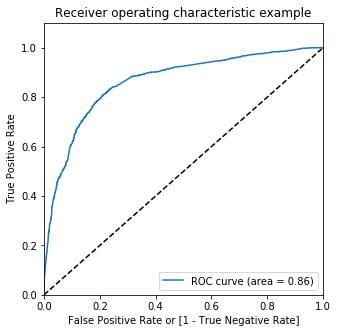

In [266]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(results['Actual values'], results['Predicted values'], drop_intermediate = False)
auc_score = metrics.roc_auc_score(results['Actual values'], results['Predicted values'])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [267]:
cut_off = pd.DataFrame()
cut_off['Churn'] = results['Actual values']
for i in [j/10 for j in range(11)]:
    cut_off[i] = results['Predicted values'].apply(lambda x : 1 if x > i else 0)
cut_off.head()

,Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
6627,1,1,1,1,1,1,1,1,1,1,0,0
4953,0,1,0,0,0,0,0,0,0,0,0,0
5111,0,1,1,0,0,0,0,0,0,0,0,0
1906,0,1,1,1,1,1,1,0,0,0,0,0
4917,0,1,0,0,0,0,0,0,0,0,0,0


In [268]:
cut_off2 = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in [j/10 for j in range(0, 11)]:
    c_m = metrics.confusion_matrix(cut_off['Churn'], cut_off[i])
    total = sum(sum(c_m))
    accuracy = (c_m[0,0] + c_m[1,1])/total
    specificity = c_m[0,0]/(c_m[0,0] + c_m[0,1])
    sensitivity = c_m[1,1]/(c_m[1,0] + c_m[1,1])
    cut_off2.loc[i] =[i, accuracy, sensitivity, specificity]
cut_off2

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.382035,1.000000,0.000000
0.1,0.1,0.529685,0.971267,0.256693
0.2,0.2,0.738250,0.893565,0.642232
0.3,0.3,0.792053,0.823553,0.772579
0.4,0.4,0.802103,0.765682,0.824618
0.5,0.5,0.802257,0.687981,0.872905
0.6,0.6,0.774119,0.541481,0.917938
0.7,0.7,0.764224,0.461352,0.951464
0.8,0.8,0.737168,0.358155,0.971479
0.9,0.9,0.690631,0.211655,0.986740


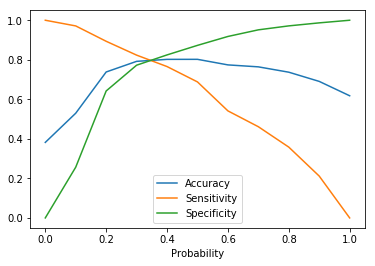

In [269]:
cut_off2.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])

The cut off seems to be 0.36

In [270]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds2 = precision_recall_curve(cut_off['Churn'], results['Predicted values'])

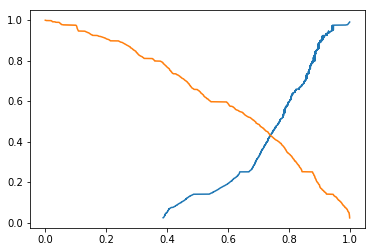

In [271]:
sns.lineplot(precision[:-1], thresholds2)
sns.lineplot(recall[:-1], thresholds2)

Looking at this curve we observe that for the optimal value of the threshold both the precision and the recall have poor values. So we will use threshold of 0.36 only

In [273]:
test_df = pd.DataFrame()
test_df['Probability Predictions'] = classifier18.predict(sm.add_constant(X_test[final_cols]))
test_df['Final'] = test_df['Probability Predictions'].apply(lambda x : 1 if x > 0.36 else 0)
test_df['Actual'] = y_test
test_df.head()

,Probability Predictions,Final,Actual
2212,0.419687,1,0
3034,0.983371,1,1
4492,0.109106,0,0
5063,0.242191,0,0
7645,0.140118,0,0


In [274]:
cm = metrics.confusion_matrix(test_df['Actual'], test_df['Final'])
cm

array([[1328,  354],
       [ 220,  870]], dtype=int64)

In [275]:
round(metrics.accuracy_score(test_df['Actual'], test_df['Final']), 2)

0.79

In [276]:
# Sensitivity
round(cm[1, 1]/(cm[1, 1] + cm[1, 0]), 2)

0.8

In [277]:
round(100*(test_df['Final'].sum()/len(test_df)), 2)

44.16

In [278]:
df_test['Pred'] = test_df['Final']
df_train['Pred'] = y_pred_train.apply(lambda x : 1 if x > 0.3 else 0)

In [ ]:
train_ = df_train[['Prospect ID', 'Lead Number', 'Pred']]
test_ = df_test[['Prospect ID', 'Lead Number', 'Pred']]

In [ ]:
answer = pd.concat([train_, test_])
answer = answer.loc[answer['Pred'] == 1]
answer